In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [3]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

In [11]:
X = pd.DataFrame(X)
X

,0,1
0,-0.093239,0.299042
1,0.415898,1.110238
2,0.098751,0.054377
3,-0.318616,-0.498557
4,-0.601736,1.136758
...,...,...
495,-0.828943,0.547630
496,0.370969,-0.410317
497,-0.648872,0.616103
498,-0.509287,-0.527586


In [14]:
y = pd.DataFrame(y)

<Axes: xlabel='0', ylabel='1'>

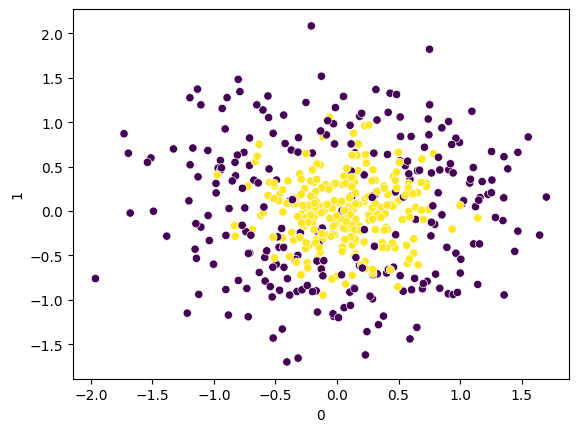

In [15]:
sns.scatterplot(x=X[0],y = X[1],c = y)

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

Ada = AdaBoostClassifier()

np.mean(cross_val_score(Ada,X,y,scoring = 'accuracy',cv = 100))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConve

np.float64(0.8159999999999998)

In [18]:
Ada.fit(X,y)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

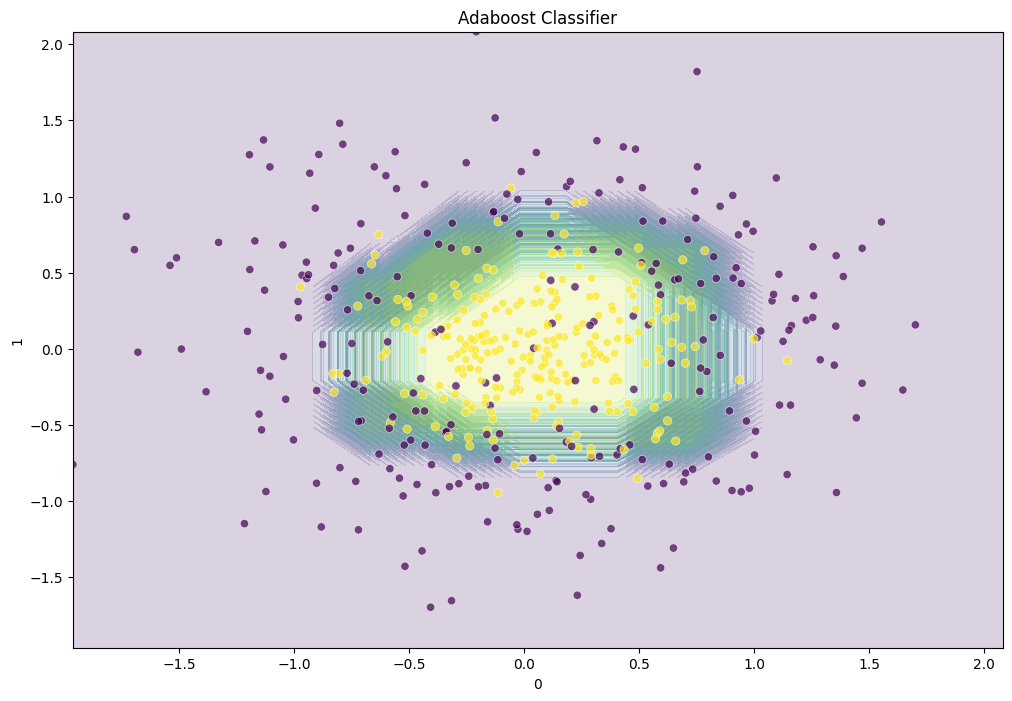

In [23]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    sns.scatterplot(x =X[0], y=X[1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(Ada)


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


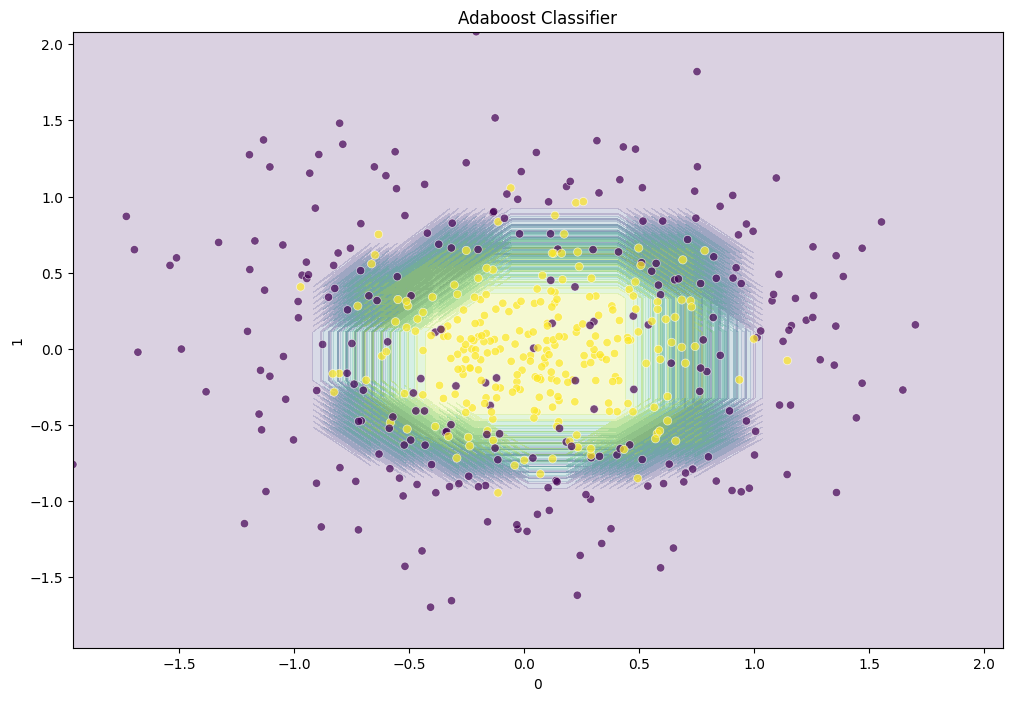

In [24]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

In [29]:
from sklearn.model_selection import GridSearchCV

grid = dict()

grid['n_estimators'] = [50,100,150]
grid['learning_rate'] = [0.001,0.01,0.1,0.5]
grid['algorithm'] = ['SAMME','SAMME.R']

gridsearch = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,cv = 100,scoring='accuracy')
grid_result = gridsearch.fit(X,y)
print(grid_result.best_score_,grid_result.best_params_)

0.8319999999999999 {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 50}


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1200 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.